In [14]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [15]:
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from IPython.display import Image

plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [16]:
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams.update({"font.size": 14})
pd.set_option("display.precision", 2)

<IPython.core.display.Javascript object>

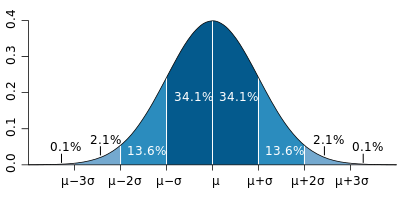

<IPython.core.display.Javascript object>

In [19]:
Image("images/gaussian.png", width=800)

In [6]:
sensor = np.random.normal(50, 10, 10000)
timestamp = ["t_" + str(i) for i in range(len(sensor))]
df = pd.DataFrame({"timestamp": timestamp, "feat": sensor})
df.head(10)

,timestamp,feat
0,t_0,73.90
1,t_1,45.71
2,t_2,46.45
3,t_3,40.64
4,t_4,53.98
5,t_5,50.80
6,t_6,50.57
7,t_7,57.52
8,t_8,47.39
9,t_9,50.09


<IPython.core.display.Javascript object>

In [7]:
print("Mean is ", round(df["feat"].mean(), 2))
print("STD is ", round(df["feat"].std(), 2))

Mean is  49.83
STD is  9.91


<IPython.core.display.Javascript object>

In [10]:
df["feat_sd"] = stats.zscore(df["feat"])
df["feat_sd_pn"] = np.where(df["feat_sd"] < 0, "negative", "positive")
df["feat_sd"] = abs(df["feat_sd"].astype("int")) + 1
df.head(10)

<IPython.core.display.Javascript object>

In [11]:
df["feat_sd"].unique()

array([ 2.42911143, -0.41543091, -0.34048132, ...,  0.56740056,
        1.54094889, -0.37121051])

<IPython.core.display.Javascript object>

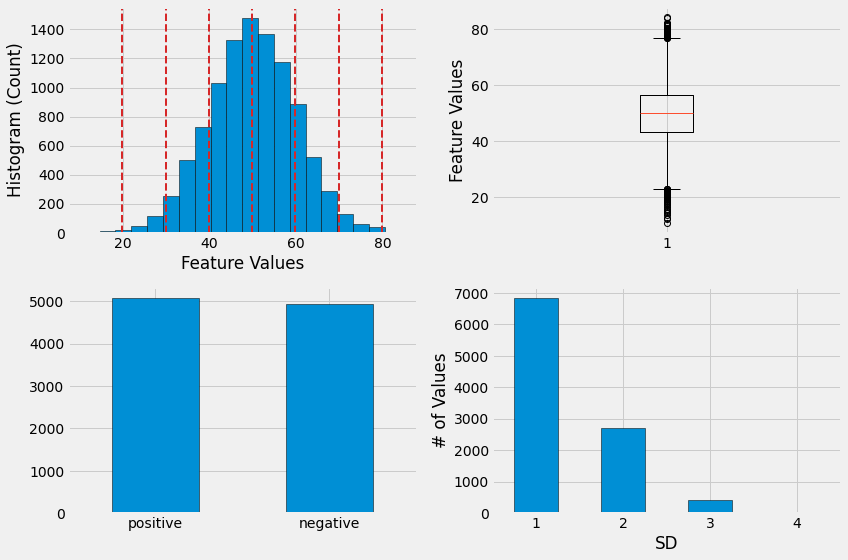

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df["feat"], bins=20, edgecolor="black")
for i in range(-3, 4):
    plt.axvline(
        df["feat"].mean() - i * df["feat"].std(),
        color="tab:red",
        linestyle="dashed",
        linewidth=2,
    )

plt.xlabel("Feature Values")
plt.ylabel("Histogram (Count)")
plt.subplot(2, 2, 2)
plt.boxplot(df["feat"].values)
plt.xlabel("")
plt.ylabel("Feature Values")
plt.subplot(2, 2, 3)
df["feat_sd_pn"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.subplot(2, 2, 4)
df["feat_sd"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("SD")
plt.ylabel("# of Values")
plt.tight_layout()

Text(0, 0.5, 'Percentage of Values (*100)')

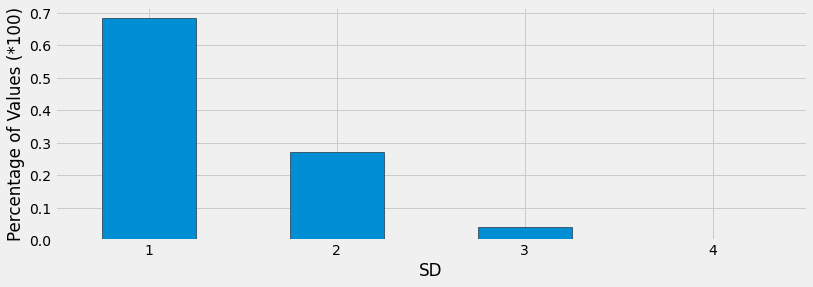

<IPython.core.display.Javascript object>

In [31]:
df["feat_sd"].value_counts(normalize=True).plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("SD")
plt.ylabel("Percentage of Values (*100)")